# HW 4 - Tim Demetriades
## Feature Selection
### Using the top 10 features here and not computing the daily change rate to get a new predictor matrix.
March 12th, 2021

In [1]:
import pandas as pd                 # for dataframes
import numpy as np                  # for arrays 
import matplotlib.pyplot as plt     # for plots
from sklearn import metrics         # for regression/roc
from sklearn.linear_model import LogisticRegression    # for regression model
from sklearn.feature_selection import RFE              # for rfe feature selection

In [2]:
# Read data
df = pd.read_csv('dataSet_2.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,914,915,916,917,918,919,920,921,922,923
0,1.85050,0.44413,-0.26072,-0.92156,-0.52009,2.73230,-1.5232,-1.2479,1.4870,-0.52449,...,-0.403160,-0.555010,-0.590640,-0.631990,-0.717270,-0.643510,-0.807630,-0.27966,-0.160250,1
1,2.13930,0.67815,-0.34487,-0.93527,-0.52009,3.08680,-1.5549,-1.2048,1.4753,-0.41132,...,-1.182500,1.527000,0.267590,2.798700,0.147000,2.835500,0.153120,0.80599,0.859200,1
2,2.19670,0.63249,-0.28908,-0.89806,-0.52009,3.08970,-1.5624,-1.1764,1.5184,-0.37138,...,0.258950,-0.537660,1.899500,0.568590,-0.992550,0.192200,-0.031013,0.69062,1.500700,1
3,2.21590,0.68735,-0.31650,-0.90001,-0.52009,3.15650,-1.5627,-1.0686,1.5353,-0.34309,...,1.780200,2.820300,0.268560,-0.150870,0.241210,-0.171270,0.292480,1.05210,-0.389050,1
4,2.26450,0.69541,-0.31650,-0.93331,-0.52009,3.09840,-1.5769,-1.1232,1.4557,-0.32478,...,-0.991740,-0.520880,-0.426940,0.506380,0.355670,-0.004882,-0.669040,0.43659,0.230740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,-0.49460,0.25691,1.60670,1.64210,1.92240,0.24546,1.9545,1.6000,1.6307,2.14820,...,-0.132260,-0.004755,-0.801210,0.042059,-0.406010,0.091662,0.730800,0.45714,0.151720,1
5918,-0.48429,0.29911,1.63510,1.67340,1.92240,0.26870,1.9817,1.6059,1.6307,2.15980,...,1.373600,-0.004755,0.982660,0.094923,1.378600,1.367900,1.516800,-0.14857,0.169040,1
5919,-0.43715,0.28530,1.66250,1.68120,1.92240,0.29775,2.0059,1.6073,1.6424,2.20810,...,-0.898300,-0.004755,-0.693790,1.147100,0.633700,0.520360,-1.208600,0.54000,0.759190,1
5920,-0.47545,0.31983,1.60670,1.71850,1.92240,0.26289,2.0425,1.6059,1.6816,2.20140,...,-0.971120,-0.004755,0.982660,-0.987020,-0.979740,-0.977890,0.984770,-0.87906,-0.865510,1


In [3]:
# Split data by predictor and response
predictor = df.iloc[:, 0:923]
response = df[923]

We now create the model.

In [7]:
# Instantiate (create an instance of) the model
logreg = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=8000)
# Fit the model with the data
logreg.fit(predictor, response)
# Predict the probability
y_pred_prob = logreg.predict_proba(predictor)[::, 1]    # this holds the probabilities for each row

This model took many iterations to converge. This is likely due to having too many features / overfitting which we will try to fix shortly. Let's now plot the model and caluclate the AUC.

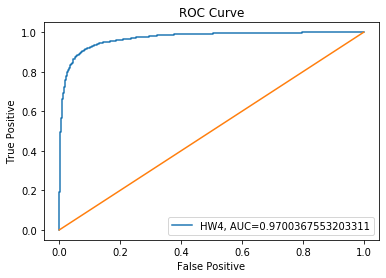

In [8]:
fpr, tpr, _ = metrics.roc_curve(response, y_pred_prob)
auc = metrics.roc_auc_score(response, y_pred_prob)
plt.plot(fpr, tpr, label='HW4, AUC='+str(auc))
plt.legend(loc=4)

# For drawing a diagonal line y=x for reference
x = [0, 1]
y = [0, 1]
plt.plot(x, y)

plt.title('ROC Curve')
plt.xlabel('False Positive')
plt.ylabel('True Positive')

plt.show()

This model looks pretty solid with a relatively good AUC of 0.816. Let's now split the data into training and testing data to see how well it does.

In [9]:
predictor_train = predictor.iloc[0:4500, :]    # first 4500 rows and all columns except last
predictor_test = predictor.iloc[4500:, :]      # last 3000 rows and all columns except last
response_train = response.iloc[0:4500]       # first 3000 rows and last column
response_test = response.iloc[4500:]         # last 3000 rows and last column

In [10]:
# Instantiate (create an instance of) the model (using the default parameters)
logreg_train = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=8000)
# Fit the model with the data
logreg_train.fit(predictor_train, response_train)
# Predict the probability
y_pred_prob_train = logreg_train.predict_proba(predictor_train)[::, 1]    # this holds the probabilites for each training row
y_pred_prob_test = logreg_train.predict_proba(predictor_test)[::, 1]      # using same model get probabilities for each testing row

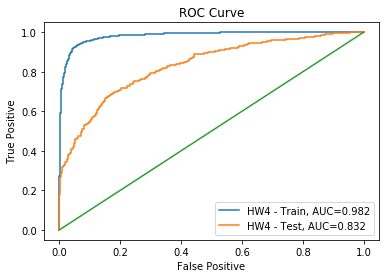

In [11]:
fpr_train, tpr_train, _ = metrics.roc_curve(response_train, y_pred_prob_train)
fpr_test, tpr_test, _ = metrics.roc_curve(response_test, y_pred_prob_test)
auc_train = round(metrics.roc_auc_score(response_train, y_pred_prob_train), 3)
auc_test = round(metrics.roc_auc_score(response_test, y_pred_prob_test), 3)
plt.plot(fpr_train, tpr_train, label='HW4 - Train, AUC='+str(auc_train))
plt.plot(fpr_test, tpr_test, label='HW4 - Test, AUC='+str(auc_test))
plt.legend(loc=4)

# For drawing a diagonal line y=x for reference
x = [0, 1]
y = [0, 1]
plt.plot(x, y)

plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.show()

In [12]:
auc_dif = auc_train - auc_test
print(f'Difference is auc values is {round(auc_dif, 3)}')

Difference is auc values is 0.15


Now let's use Recursive Feature Elimination (RFE) to eliminate some less important features.

We'll try taking the top 10 features.

Note - this took very long but not quite as long as the first 2 parts (around half a day).

In [13]:
# Instantiate (create an instance of) the model (using the default parameters)
logreg_train = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=8000)

rfe = RFE(logreg_train, 10)
fit = rfe.fit(predictor_train, response_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fa

In [14]:
# Predict the probability
y_pred_prob_train_rfe = fit.predict_proba(predictor_train)[::, 1]    # this holds the probabilites for each training row
y_pred_prob_test_rfe = fit.predict_proba(predictor_test)[::, 1]      # using same model get probabilities for each testing row

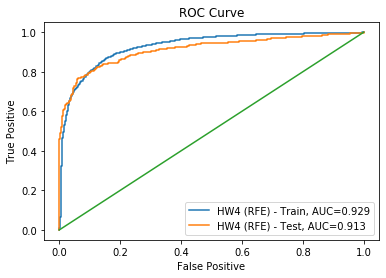

In [15]:
fpr_train, tpr_train, _ = metrics.roc_curve(response_train, y_pred_prob_train_rfe)
fpr_test, tpr_test, _ = metrics.roc_curve(response_test, y_pred_prob_test_rfe)
auc_train = round(metrics.roc_auc_score(response_train, y_pred_prob_train_rfe), 3)
auc_test = round(metrics.roc_auc_score(response_test, y_pred_prob_test_rfe), 3)
plt.plot(fpr_train, tpr_train, label='HW4 (RFE) - Train, AUC='+str(auc_train))
plt.plot(fpr_test, tpr_test, label='HW4 (RFE) - Test, AUC='+str(auc_test))
plt.legend(loc=4)

# For drawing a diagonal line y=x for reference
x = [0, 1]
y = [0, 1]
plt.plot(x, y)

plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.show()

In [16]:
auc_dif = auc_train - auc_test
print(f'Difference is auc values is {round(auc_dif, 3)}')

Difference is auc values is 0.016


Here we can see that compared to the training curve, the testing curve is great (only a 0.016 AUC difference). Additionally, both curves are very high, meaning the model is very accurate.